In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout





Loading the California Housing dataset

In [ ]:
Cali=pd.read_csv("/content/drive/My Drive/Week 1 Deep/housing (1).csv")

In [ ]:
Cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Exploration

In [ ]:
Cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
Cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
Cali.shape

(20640, 10)

In [ ]:
Cali.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Missing values treatment

In [ ]:
Cali.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:
Cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
Cali=Cali.dropna(how="any")
Cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Data Exploration using Visualization

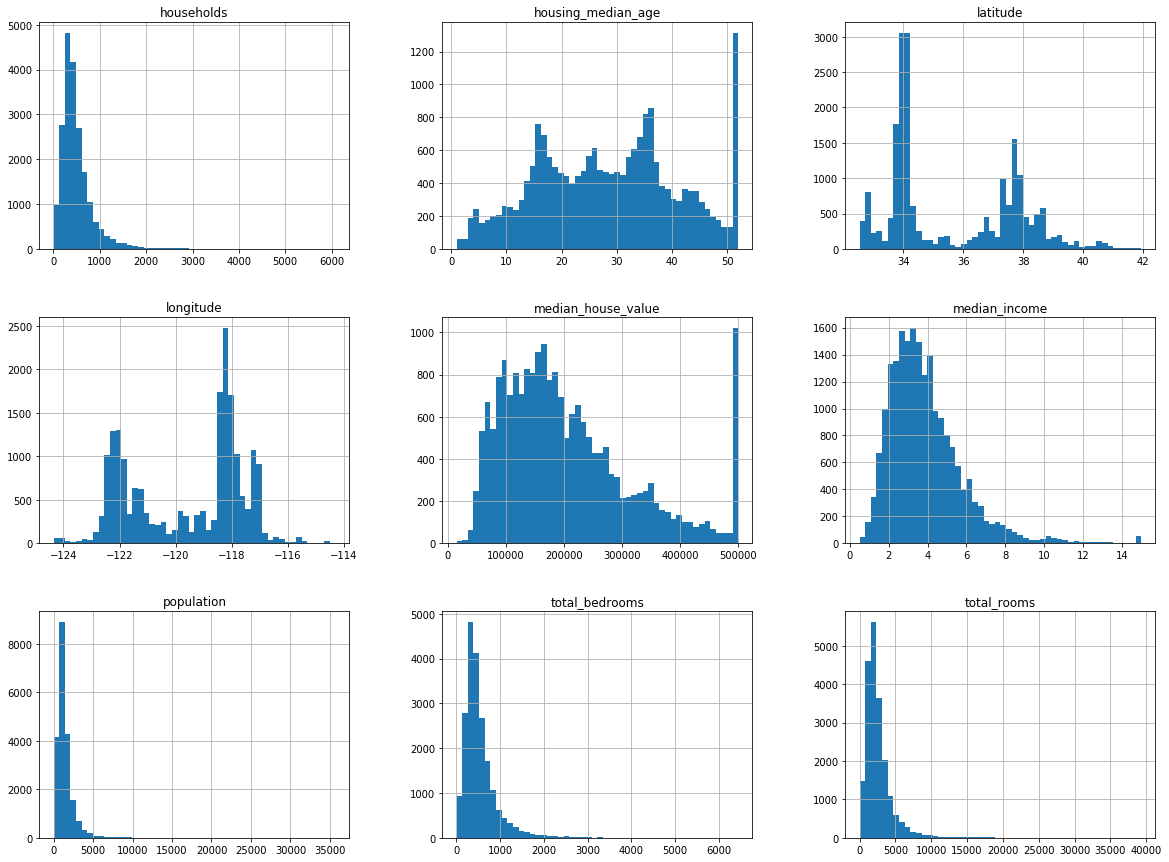

In [ ]:
## Univariate Analysis
Cali.hist(bins=50, figsize=(20,15))
plt.savefig('Plots')
plt.show()

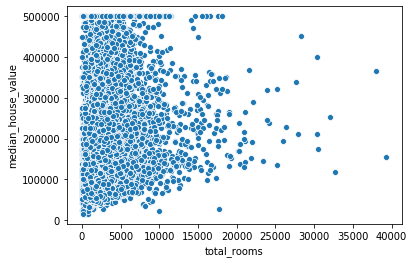

In [ ]:
import seaborn as sns
sns.scatterplot(Cali['total_rooms'],Cali['median_house_value'])
## The num of houses is more if ocean proximity is bay area or near ocean

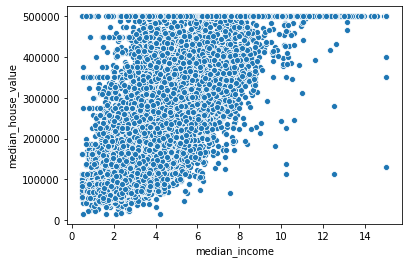

In [ ]:
sns.scatterplot(Cali['median_income'], Cali['median_house_value'])
## No proper correlation or pattern observed with respect to price and rooms

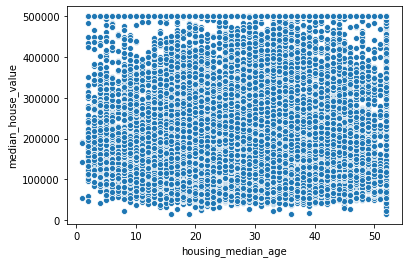

In [ ]:
sns.scatterplot(Cali['housing_median_age'], Cali['median_house_value'])
## From below we can see that moderate positive correlation is observed between them

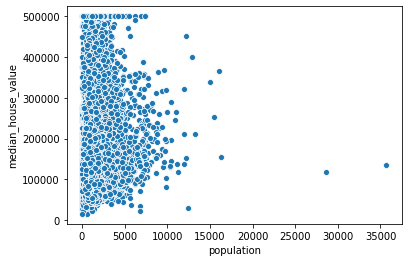

In [ ]:
sns.scatterplot(Cali['population'], Cali['median_house_value'])
## No noticeable pattern is observed

Heatmap and correlation matrix

In [ ]:
corr = Cali.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


Text(0.5, 1, 'Heatmap of the Correlation Matrix')

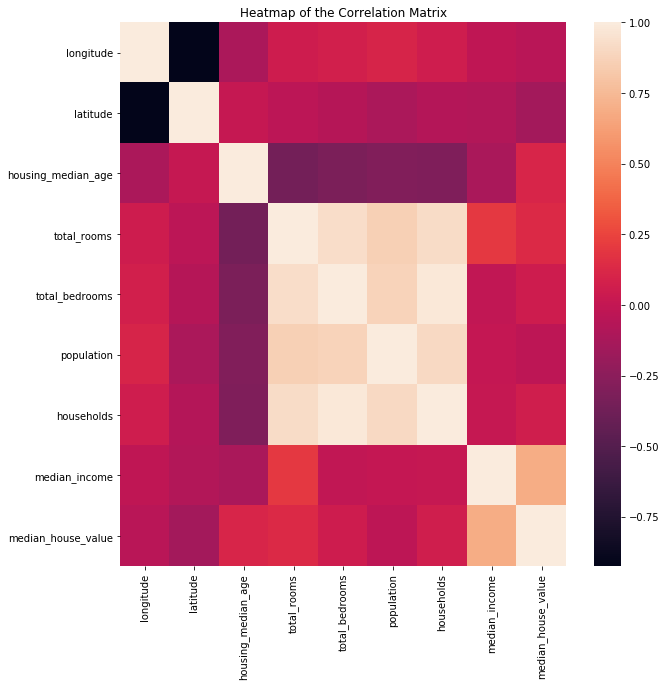

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Heatmap of the Correlation Matrix')

Feature Engineering

In [ ]:
Cali=pd.get_dummies(Cali, columns=["ocean_proximity"],drop_first=True)
Cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [ ]:
X=Cali.iloc[:,2:8]
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
Cali.iloc[:,2:8]=rescaledX
Cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0,0,1,0
1,-122.22,37.86,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0,0,1,0
2,-122.24,37.85,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0,0,1,0
3,-122.25,37.85,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0,0,1,0
4,-122.25,37.85,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0,0,1,0


Model_Fitting

In [ ]:
Cali_model=shuffle(Cali.iloc[:,2:],random_state=123).reset_index(drop=True)
Cali_model.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.431373,0.061371,0.101179,0.035651,0.097846,0.181997,101800.0,0,0,0,1
1,0.450980,0.072893,0.081626,0.035903,0.079921,0.194363,213000.0,1,0,0,0
2,0.745098,0.059973,0.094041,0.057289,0.099326,0.083137,58800.0,1,0,0,0
3,0.196078,0.031207,0.036468,0.016200,0.031080,0.179453,111300.0,0,0,0,0
4,0.392157,0.044153,0.045624,0.027467,0.048841,0.298444,174100.0,0,0,0,1


In [ ]:
X=Cali_model.drop(["median_house_value"],axis=1)
Y=Cali_model["median_house_value"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=234)
print(X_train.shape)
print(Y_train.shape)

(16346, 10)
(16346,)


Linear_Model

In [ ]:
## model=LinearRegression().fit(X_train,Y_train)

In [ ]:
## Model_1  without using drop_out
  model=Sequential()
  model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1))


In [ ]:
## Model Compilation
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [ ]:
history = model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs=100, batch_size=10, 
          verbose=1)

Train on 16346 samples, validate on 4087 samples
Epoch 1/100
16346/16346 [==============================] - 3s 188us/step - loss: 37828150732.3646 - mean_absolute_error: 156788.2412 - mean_squared_error: 37828150732.3646 - val_loss: 12612644370.4155 - val_mean_absolute_error: 89346.3750 - val_mean_squared_error: 12612644370.4155
Epoch 2/100
16346/16346 [==============================] - 2s 150us/step - loss: 10093865481.0209 - mean_absolute_error: 78437.5755 - mean_squared_error: 10093865481.0209 - val_loss: 8518373630.0582 - val_mean_absolute_error: 70808.1502 - val_mean_squared_error: 8518373630.0582
Epoch 3/100
16346/16346 [==============================] - 2s 152us/step - loss: 7408420446.2890 - mean_absolute_error: 65480.5956 - mean_squared_error: 7408420446.2890 - val_loss: 6923256923.0125 - val_mean_absolute_error: 62393.4447 - val_mean_squared_error: 6923256923.0125
Epoch 4/100
16346/16346 [==============================] - 2s 150us/step - loss: 6240102015.0173 - mean_absolute_

In [ ]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

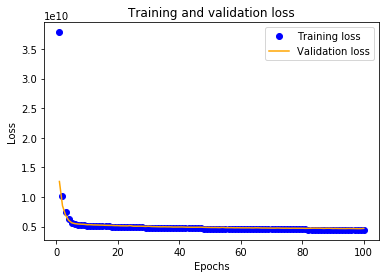

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

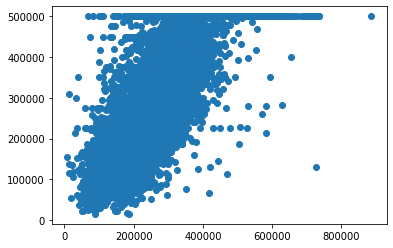

In [ ]:
## scatter plot for training dataset
myPreds_train = model.predict(X_train)
myActual_train = Y_train
plt.scatter(myPreds_train, myActual_train)

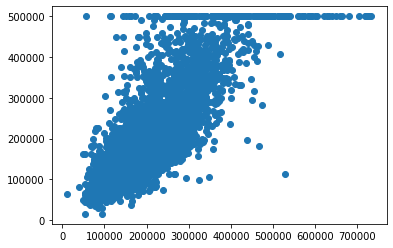

In [ ]:
## Scatetr plot for testing data set
myPreds_test = model.predict(X_test)
myActual_test = Y_test
plt.scatter(myPreds_test, myActual_test)

In [ ]:
resultDF = pd.DataFrame(history_dict)
resultDF.head()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error
0,1.261264e+10,89346.374966,1.261264e+10,3.782815e+10,156788.241198,3.782815e+10
1,8.518374e+09,70808.150217,8.518374e+09,1.009387e+10,78437.575523,1.009387e+10
2,6.923257e+09,62393.444663,6.923257e+09,7.408420e+09,65480.595640,7.408420e+09
3,6.063370e+09,57573.530870,6.063370e+09,6.240102e+09,59505.603843,6.240102e+09
4,5.644288e+09,55287.861723,5.644288e+09,5.629946e+09,55974.385198,5.629946e+09


In [ ]:
# RMSE
import math
from sklearn.metrics import mean_squared_error
import numpy as np
print(mean_squared_error(Y_test, myPreds_test))
print(np.sqrt(mean_squared_error(Y_test, myPreds_test)))

4639065427.481026
68110.6851197448


In [ ]:
results = model.evaluate(X_test, Y_test)
results

4087/4087 [==============================] - 0s 20us/step


[4639065425.679472, 48010.650721800834, 4639065425.679472]

Model_2 Dense Neural Network Architecture 2

In [ ]:
# Different Dropout values
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu',
input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Compile the model
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [ ]:
history = model2.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs=50, batch_size=10, 
          verbose=1) 

Train on 16346 samples, validate on 4087 samples
Epoch 1/50
16346/16346 [==============================] - 3s 206us/step - loss: 36694274160.7459 - mean_absolute_error: 153628.2931 - mean_squared_error: 36694274160.7459 - val_loss: 12655117709.9369 - val_mean_absolute_error: 89332.6409 - val_mean_squared_error: 12655117709.9369
Epoch 2/50
16346/16346 [==============================] - 3s 173us/step - loss: 10588977430.0355 - mean_absolute_error: 80085.0556 - mean_squared_error: 10588977430.0355 - val_loss: 8624535623.9706 - val_mean_absolute_error: 70613.1674 - val_mean_squared_error: 8624535623.9706
Epoch 3/50
16346/16346 [==============================] - 3s 169us/step - loss: 7999916496.0920 - mean_absolute_error: 67599.4848 - mean_squared_error: 7999916496.0920 - val_loss: 7033372646.0993 - val_mean_absolute_error: 63005.5443 - val_mean_squared_error: 7033372646.0993
Epoch 4/50
16346/16346 [==============================] - 3s 172us/step - loss: 6910892101.2387 - mean_absolute_erro

In [ ]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

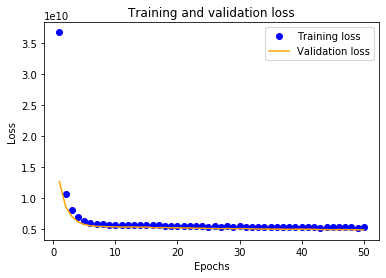

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

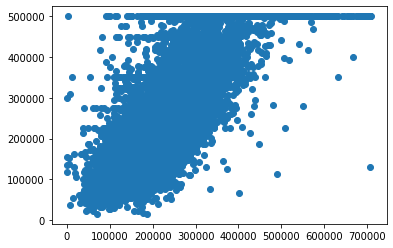

In [ ]:
# Scatter plot for Training Data
myPreds_train = model2.predict(X_train)
myActual_train = Y_train
plt.scatter(myPreds_train, myActual_train)

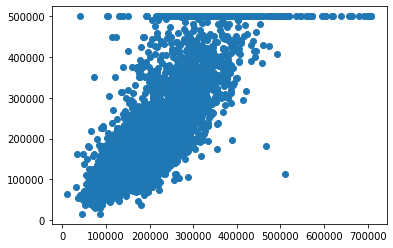

In [ ]:
# Scatter plot for Test Data
myPreds_test = model2.predict(X_test)
myActual_test = Y_test
plt.scatter(myPreds_test, myActual_test)

In [ ]:
# RMSE
import math
print(mean_squared_error(Y_test, myPreds_test))
print(np.sqrt(mean_squared_error(Y_test, myPreds_test)))


4870521607.69629
69789.12241672257


In [ ]:
results = model2.evaluate(X_test, Y_test)
results

4087/4087 [==============================] - 0s 25us/step


[4870521603.8835335, 49981.78389749511, 4870521603.8835335]

In [ ]:
resultDF = pd.DataFrame(history_dict)
print(resultDF.shape)
print(resultDF.head())

(50, 6)
       val_loss  ...  mean_squared_error
0  1.265512e+10  ...        3.669427e+10
1  8.624536e+09  ...        1.058898e+10
2  7.033373e+09  ...        7.999916e+09
3  6.165303e+09  ...        6.910892e+09
4  5.750164e+09  ...        6.248749e+09

[5 rows x 6 columns]


Model_3 Dense Neural Network Architecture 3

In [ ]:
# Different sizes of layers 
model3 = models.Sequential()
model3.add(layers.Dense(356, activation='relu',input_shape=(X_train.shape[1],)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1))

In [ ]:
# Compile the model
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [ ]:
history = model3.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs=50, batch_size=10, 
          verbose=1) 

Train on 16346 samples, validate on 4087 samples
Epoch 1/50
16346/16346 [==============================] - 5s 276us/step - loss: 12239216837.3014 - mean_absolute_error: 79930.0330 - mean_squared_error: 12239216837.3014 - val_loss: 5574563274.6327 - val_mean_absolute_error: 55295.0509 - val_mean_squared_error: 5574563274.6327
Epoch 2/50
16346/16346 [==============================] - 4s 226us/step - loss: 5261226098.9150 - mean_absolute_error: 52932.5049 - mean_squared_error: 5261226098.9150 - val_loss: 5357772901.7862 - val_mean_absolute_error: 52718.3835 - val_mean_squared_error: 5357772901.7862
Epoch 3/50
16346/16346 [==============================] - 4s 239us/step - loss: 5129033206.1177 - mean_absolute_error: 51832.2599 - mean_squared_error: 5129033206.1177 - val_loss: 5204746432.5794 - val_mean_absolute_error: 52747.4687 - val_mean_squared_error: 5204746432.5794
Epoch 4/50
16346/16346 [==============================] - 4s 244us/step - loss: 5038853128.6920 - mean_absolute_error: 51

In [ ]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

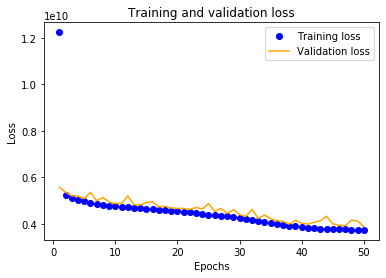

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

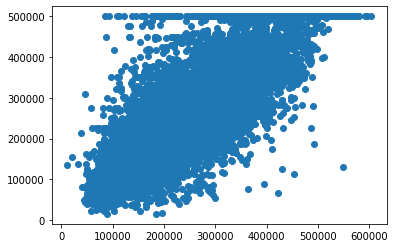

In [ ]:
# Scatter plot for Training Data
myPreds_train = model3.predict(X_train)
myActual_train = Y_train
plt.scatter(myPreds_train, myActual_train)

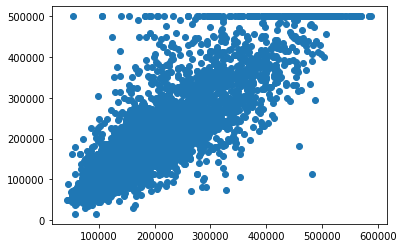

In [ ]:
# Scatter plot for Test Data
myPreds_test = model3.predict(X_test)
myActual_test = Y_test
plt.scatter(myPreds_test, myActual_test)

In [ ]:
# RMSE
import math
print(mean_squared_error(Y_test, myPreds_test))
print(np.sqrt(mean_squared_error(Y_test, myPreds_test)))

3933026832.1448975
62713.848806662296


In [ ]:
results = model3.evaluate(X_test, Y_test)
results

4087/4087 [==============================] - 0s 29us/step


[3878781921.3388796, 43000.03840110411, 3878781921.3388796]

In [ ]:
resultDF = pd.DataFrame(history_dict)
print(resultDF.shape)
print(resultDF.head())

(50, 6)
       val_loss  ...  mean_squared_error
0  5.662280e+09  ...        1.201322e+10
1  5.440057e+09  ...        5.255265e+09
2  5.293731e+09  ...        5.114799e+09
3  5.130378e+09  ...        5.034980e+09
4  5.176384e+09  ...        4.959719e+09

[5 rows x 6 columns]
